# Mycological Risk Assessment - Machine Learning Approach

## Project Overview
The project's focus is to train a machine learning model capable of accurately classifying mushrooms as edible or poisonous by analysing their physical characteristics. The model is designed to assist teams of mycologists in conducting risk assessments associated with fungal species.

## Background Information
Mushrooms exhibit a wide variety of physical attributes, making it challenging to distinguish between edible and poisonous species, even for experienced mycologists. Accurate classification is crucial because some mushrooms contain toxins that can cause serious health problems or even be fatal if ingested. Traditional methods of mushroom identification based on visual features are time-consuming and error-prone. This project endeavors to leverage machine learning algorithms using the Mushroom dataset, containing attributes such as cap shape, odor, gill size, and more, to develop a reliable model that streamlines the classification process and enhances safety in mushroom identification practices for mycologists and enthusiasts alike.

### Challenges
1. Imbalanced Dataset: The mushroom data set might have an imbalance in the distribution of classes(edible, poisonous), thus affect the model's pattern learning accuracy.
2. Feature Selection and Interpretability: Selecting the most relevant features and ensuring the model's interpretability could be crucial for mycologists to understand the classification decisions.

### Solutions
1. Employ oversampling(SMOTE), undersampling, or utilize algorithms robust to imbalanced data to ensure fair representation of classes.
2. Utilize feature importance methods(Random Forest Feature Importance) and model-agnostic interpretability techniques for better insights into model decisions.

## Problem Statement
Mycologists face the daunting challenge of quickly and accurately distinguishing edible mushrooms from poisonous mushrooms based on their physical attributes. To address this, the project aims to develop a robust machine learning model using the Mushroom dataset. This model seeks to provide mycologists with a reliable tool for on-the-spot mushroom classification during fieldwork, significantly reducing the risks associated with misidentification and enhancing safety measures for both researchers and the general populace.

## Objectives

### General Objective
* To develop a machine learning model capable of accurately classifying mushrooms as either edible or poisonous based on their physical attributes, aiding mycologists in the reliable identification of fungal species for scientific research and safety measures.

### Specific Objectives
* To develop a classification model
* Enhance model performance through algorithm selection
* Fine-tune Hyperparameters for Model Optimization
* Explore ensemble learning approaches
* Ensure model deployment feasibility

## Data Wrangling
This project uses a Mushroom dataset sourced from Kaggle, but originally donated to the UCL Machine Learning repository, it includes 61069 hypothetical mushrooms with caps based on 173 species (353 mushrooms per species). Each mushroom is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended (the latter class was combined with the poisonous class).
Of the 20 variables, 17 are nominal and 3 are metrical.

#### Column Descriptions
* `classes`: edible=e, poisonous=p(binary)

    (n: nominal, m: metrical; nominal values as sets of values)


* `cap-diameter` (m):    float number in cm

* `cap-shape`(n):    bell=b, conical=c, convex=x, flat=f, sunken=s, spherical=p, others=o

* `cap-surface` (n):    fibrous=i, grooves=g, scaly=y, smooth=s, shiny=h, leathery=l, silky=k, sticky=t, wrinkled=w, fleshy=e

* `cap-color`  (n):  brown=n, buff=b, gray=g, green=r, pink=p,purple=u, red=e, white=w, yellow=y, blue=l, orange=o,  black=k

* `does-bruise-or-bleed `(n):    bruises-or-bleeding=t,no=f

* `gill-attachment` (n):    adnate=a, adnexed=x, decurrent=d, free=e, sinuate=s, pores=p, none=f, unknown=?

* `gill-spacing` (n):    close=c, distant=d, none=f

* `gill-color`(n):   see cap-color + none=f

* `stem-height`(m):    float number in cm

* `stem-width` (m):    float number in mm  

* `stem-root`(n):    bulbous=b, swollen=s, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r

* `stem-surface` (n):    see cap-surface + none=f

* `stem-color`(n):    see cap-color + none=f

* `veil-type` (n):    partial=p, universal=u

* `veil-color`(n):    see cap-color + none=f

* `has-ring`(n):    ring=t, none=f

* `ring-type` (n):    cobwebby=c, evanescent=e, flaring=r, grooved=g,  large=l, pendant=p, sheathing=s, zone=z, scaly=y, movable=m, none=f, unknown=?

* `spore-print-color`(n):    see cap color

* `habitat`(n):    grasses=g, leaves=l, meadows=m, paths=p, heaths=h, urban=u, waste=w, woods=d

* `season`(n):    spring=s, summer=u, autumn=a, winter=w



### Loading the dataset

In [123]:
# Importing necessary libraries for data analysis, visualization
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#data preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from imblearn.over_sampling import SMOTE

#models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

#evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay


%matplotlib inline

In [100]:

"""
This class loads the data, displays the first or the last rows, drops columns,
replaces missing values with placeholders and can display the info and summary of the data.
"""
class DataHandler:
    def __init__(self, file_path):
        self.file_path = file_path
        self.df = None

    def load_data(self, sep=',', error_bad_lines=False):
        try:
            self.df = pd.read_csv(self.file_path, sep=sep, error_bad_lines=error_bad_lines)
        except Exception as e:
            print(f"Error loading data: {str(e)}")

    def head(self, n=5):
        if self.df is not None:
            return self.df.head(n)
        else:
            print("No data loaded yet.")
            return None

    def tail(self, n=5):
        if self.df is not None:
            return self.df.tail(n)
        else:
            print("No data loaded yet.")
            return None

    def summary(self):
        if self.df is not None:
            return self.df.describe()
        else:
            print("No data loaded yet.")
            return None

    def info(self):
        if self.df is not None:
            return self.df.info()
        else:
            print("No data loaded yet.")
            return None

    def drop_columns(self, columns_to_drop):
        if self.df is not None:
            try:
                self.df.drop(columns=columns_to_drop, inplace=True)
                print("Columns dropped successfully!")
            except Exception as e:
                print(f"Error dropping columns: {str(e)}")
        else:
            print("No data loaded yet.")

    def replace_missing_with_placeholder(self, placeholder='missing'):
        if self.df is not None:
            self.df.fillna(placeholder, inplace=True)
            print("Missing values replaced with placeholder successfully!")
        else:
            print("No data loaded yet.")


Load the dataset then look at the first 5 rows to familiarise ourselves with the data.

In [101]:
# Loading the dataset

file_path = '/content/sample_data/dataset/secondary_data.csv'
data_handler = DataHandler(file_path)

# Load data
data_handler.load_data(sep=';', error_bad_lines=False)


# Check head
data_handler.head()

<ipython-input-100-22514bea69b9>:8: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  self.df = pd.read_csv(self.file_path, sep=sep, error_bad_lines=error_bad_lines)


,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


Summary for the numerical columns in the data.

In [102]:
#Numerical Summary
data_handler.summary()

,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,6.733854,6.581538,12.149410
std,5.264845,3.370017,10.035955
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.210000
50%,5.860000,5.950000,10.190000
75%,8.540000,7.740000,16.570000
max,62.340000,33.920000,103.910000


Lets look at a comprehensive summary of the data we have, both categorical and numerical columns.

In [103]:
# Information
data_handler.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

## Exploratory Data Analysis
### Univariate Analysis
We look at the `class` column to see the distributions.

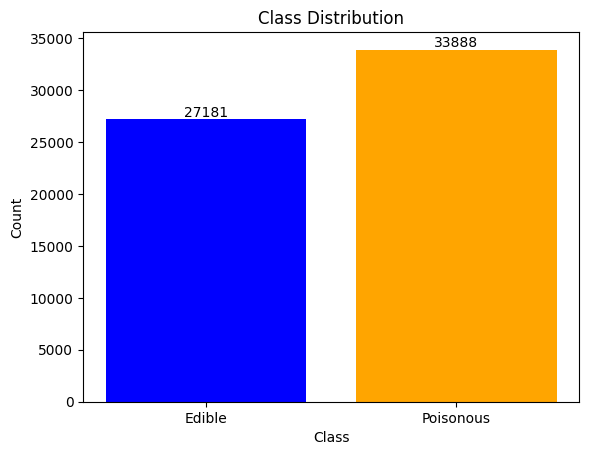

In [104]:
 #Univariate Analysis
#plotting the target variable distribution
class_counts = df.groupby("class").size()

# Create a bar chart
plt.bar(class_counts.index, class_counts.values, color=['blue', 'orange'])
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks([0, 1], ["Edible", "Poisonous"])

# Annotate the bars with value counts
for i, count in enumerate(class_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Show the chart
plt.show()

There is a slight imbalance, so we'll use SMOTE to mitigate this when applying our model.

Now, lets look at the rest of the categorical columns' distributions.

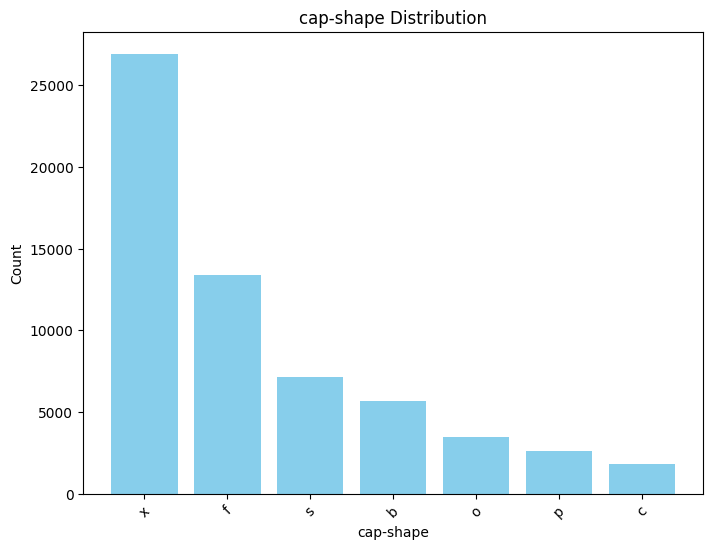

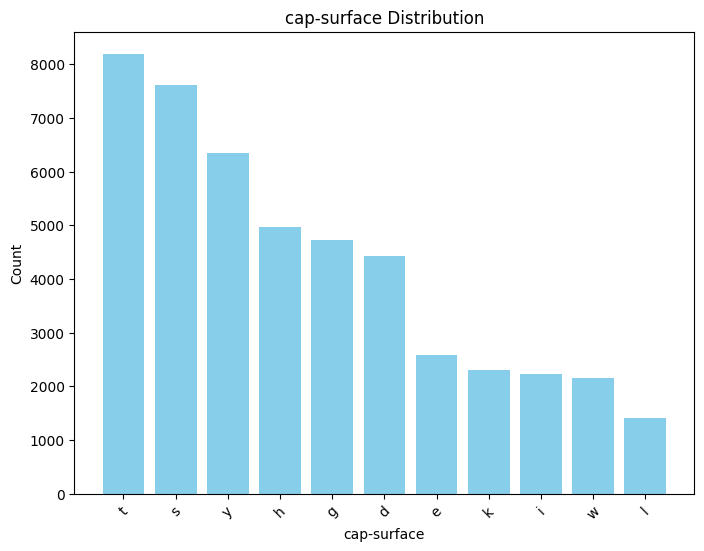

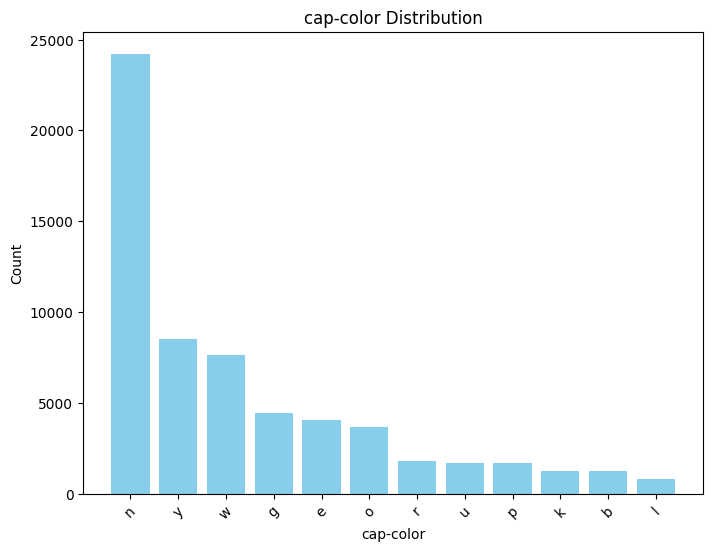

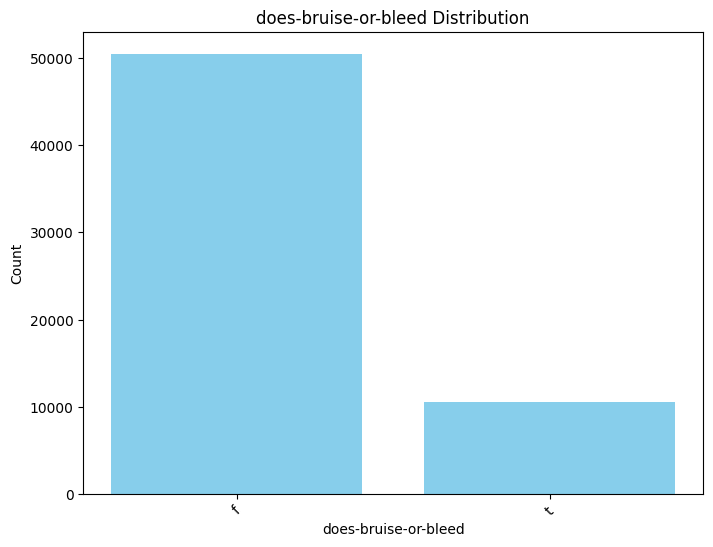

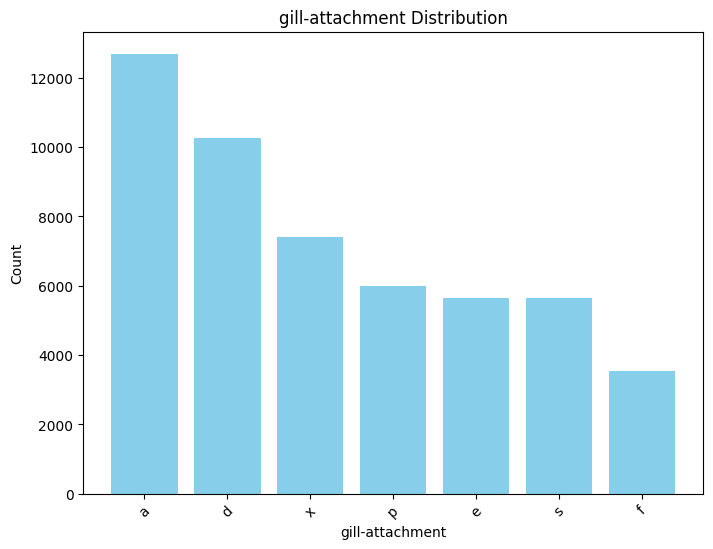

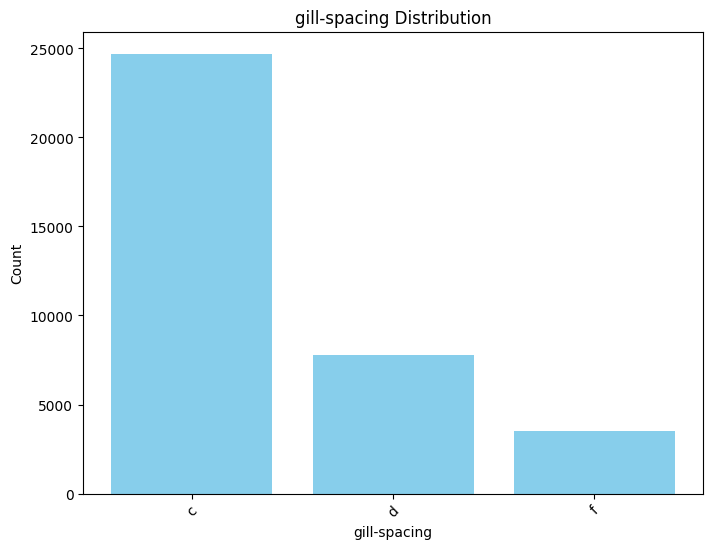

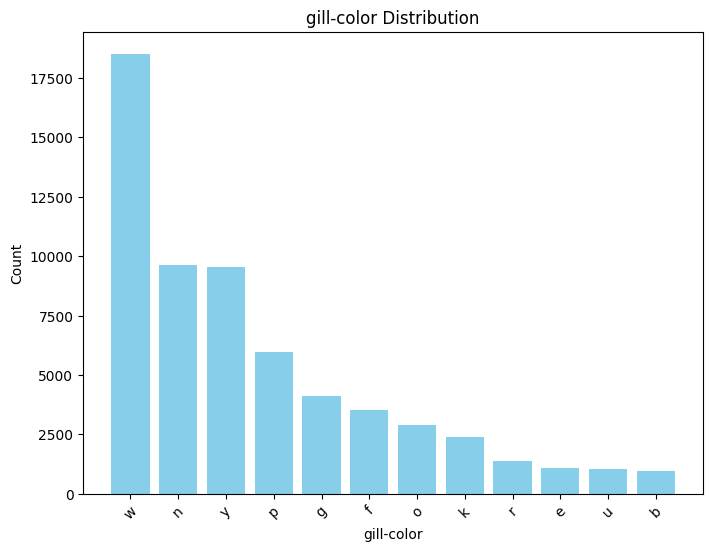

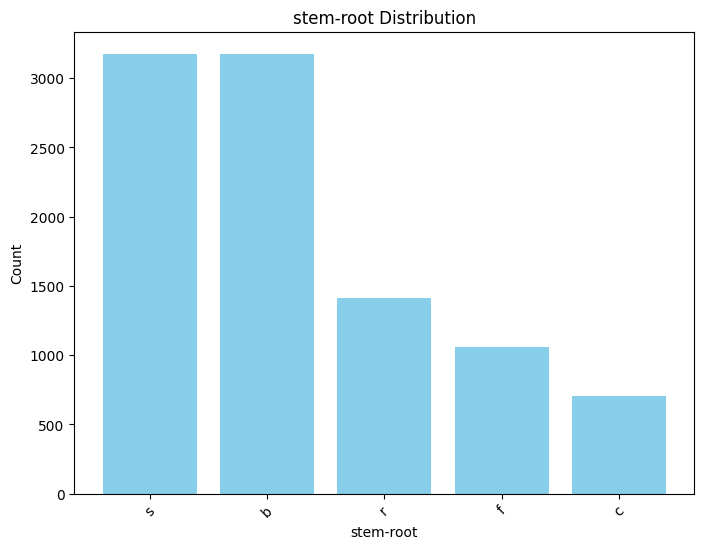

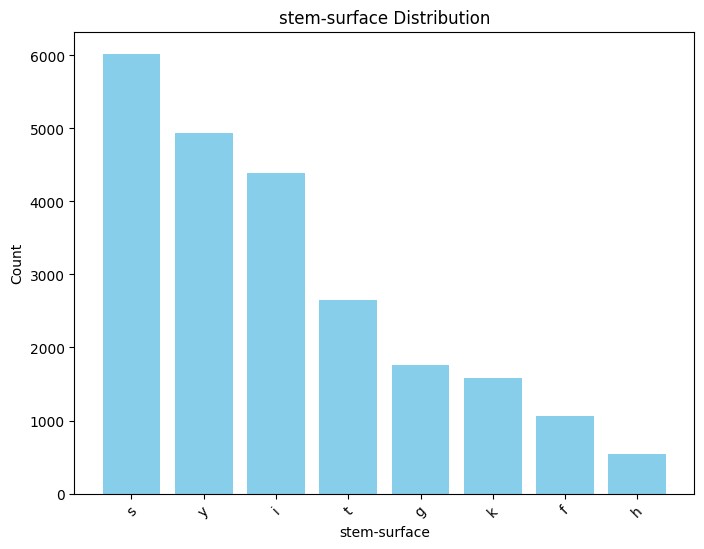

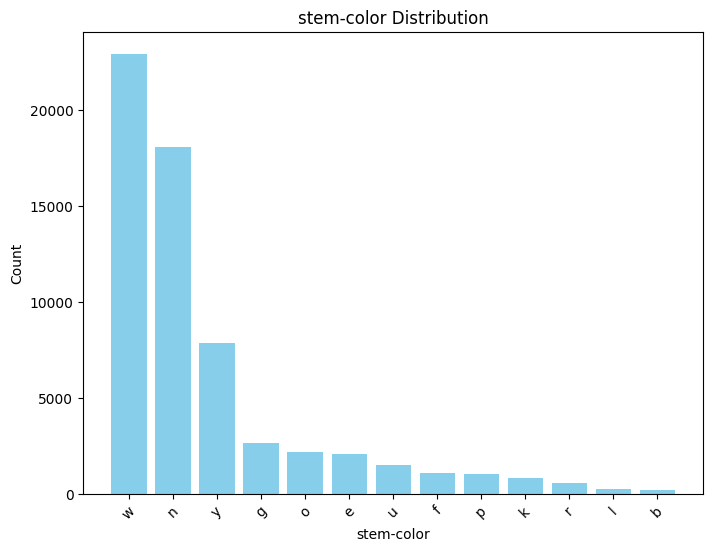

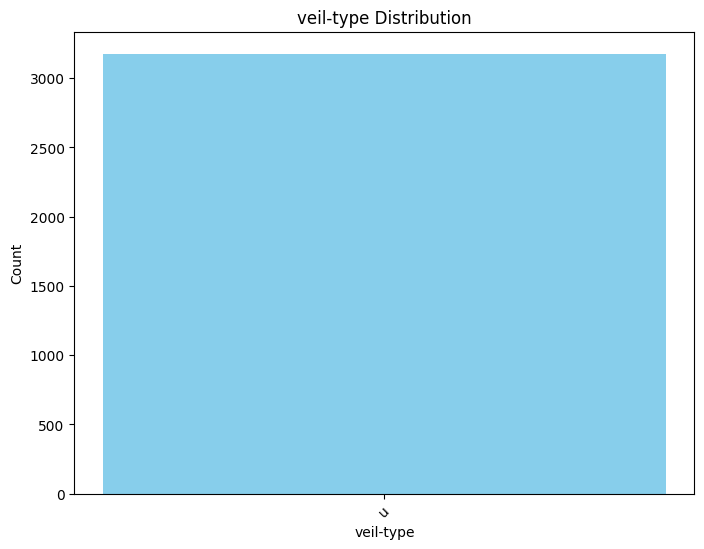

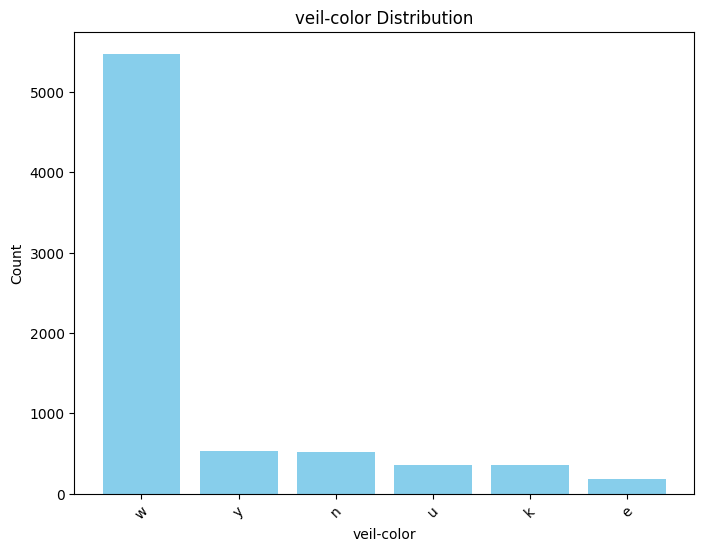

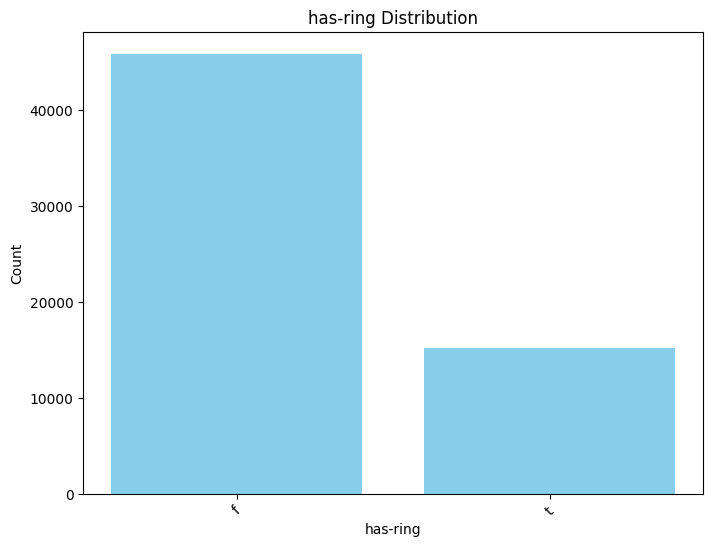

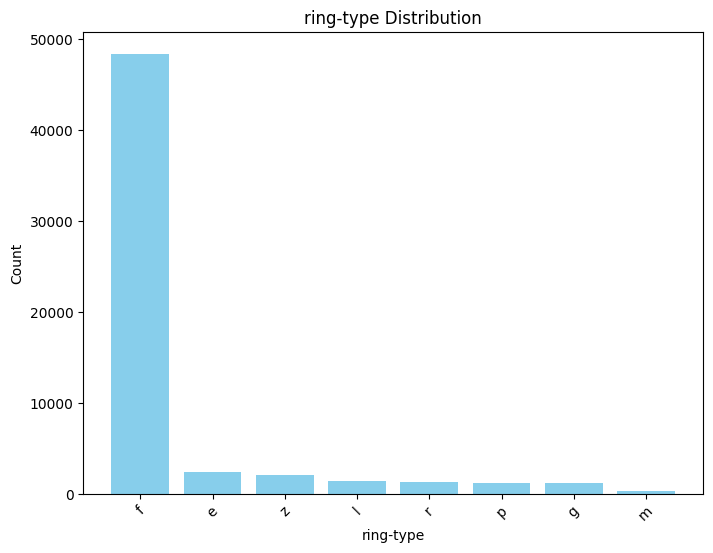

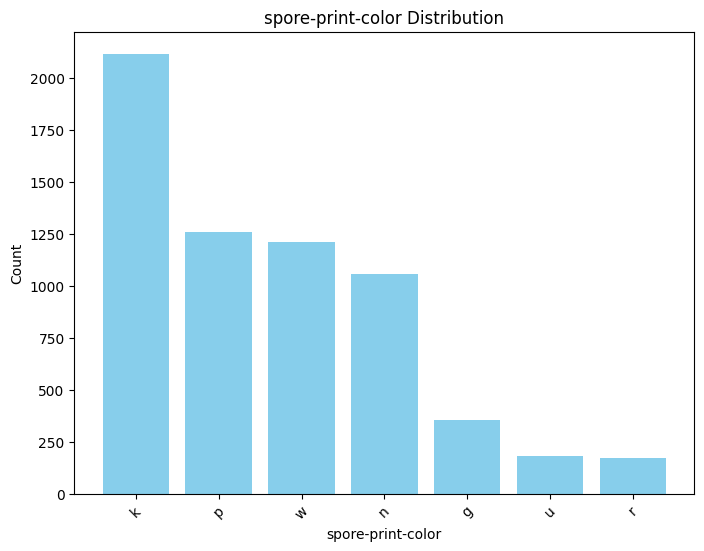

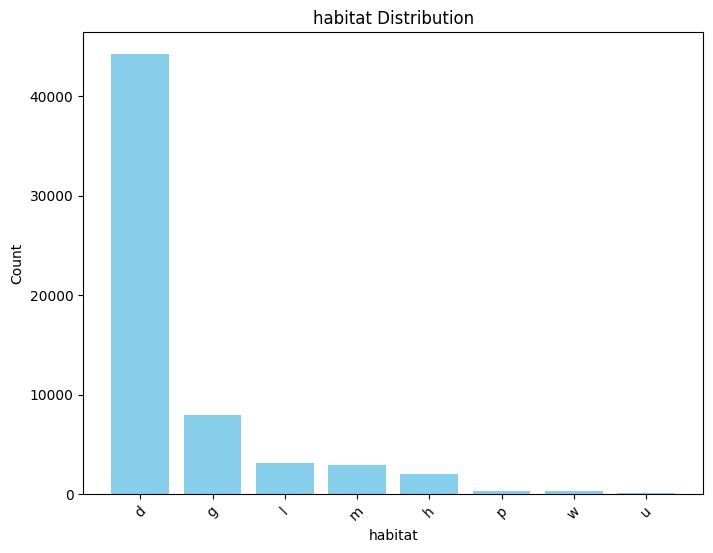

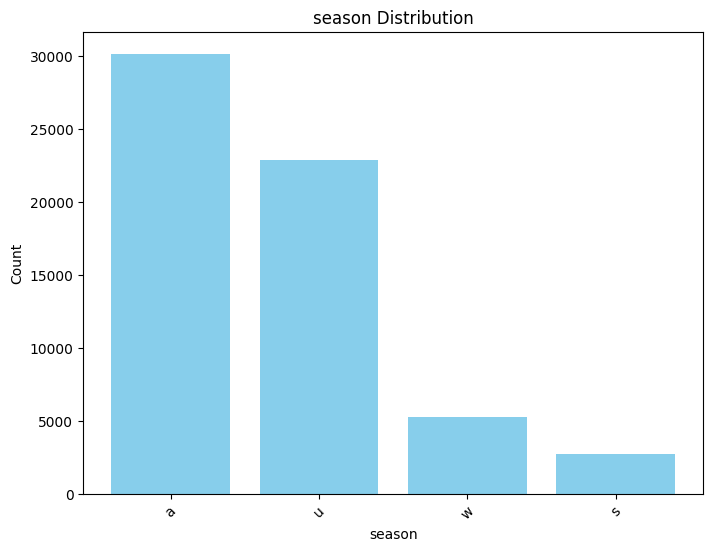

In [105]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Excluding 'class' column from the categorical columns list
remaining_categorical_columns = [col for col in categorical_columns if col != 'class']

# Plotting bar charts for each remaining categorical column
for col in remaining_categorical_columns:
    col_counts = df[col].value_counts()

    plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
    plt.bar(col_counts.index, col_counts.values, color='skyblue')
    plt.title(f"{col} Distribution")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

    plt.show()

From the distributions above we can flag, `veil-type` and `veil-color` for dropping.

Now lets look at the relationship of columns with other columns and see if the two might survive or others may be added to the dropping list.

### Multivariate Analysis
From the previous summary we can see significant missing values, with more than 75% missing for certain columns.
Lets look at the correlation of the columns and see how to deal with them.

<ipython-input-106-9f68ee795e3a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


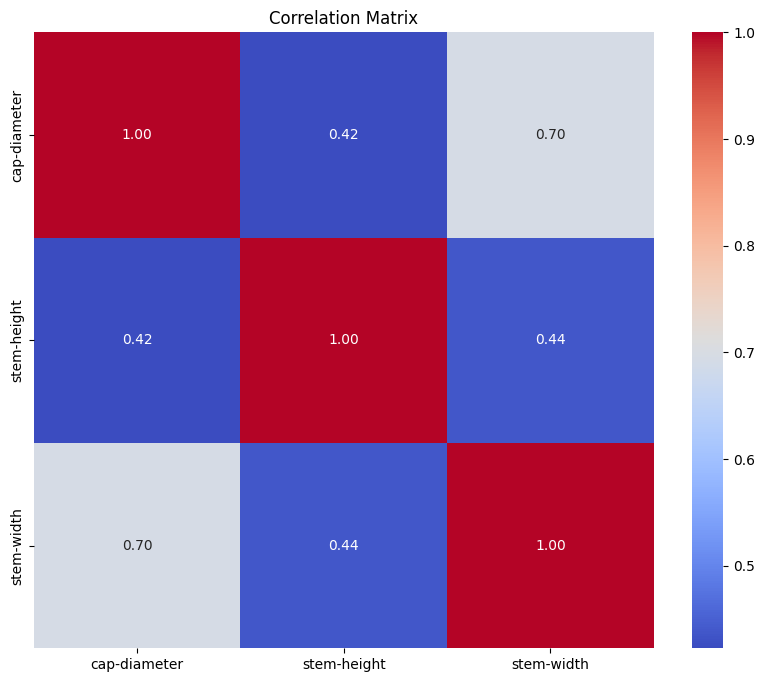

In [106]:

correlation_matrix = df.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

We only have three numerical features, so a correlation matrix is not the best option, instead we can identify the columns containing missing values, create a copy and replace missing values wiht a placeholder, then plot count plots to visualize the relationship between each column with missing values and the rest of the categorical columns.

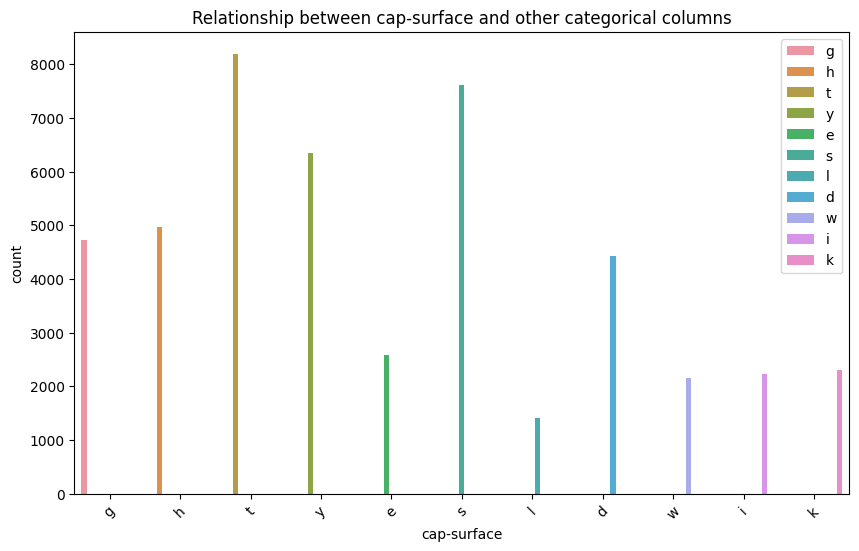

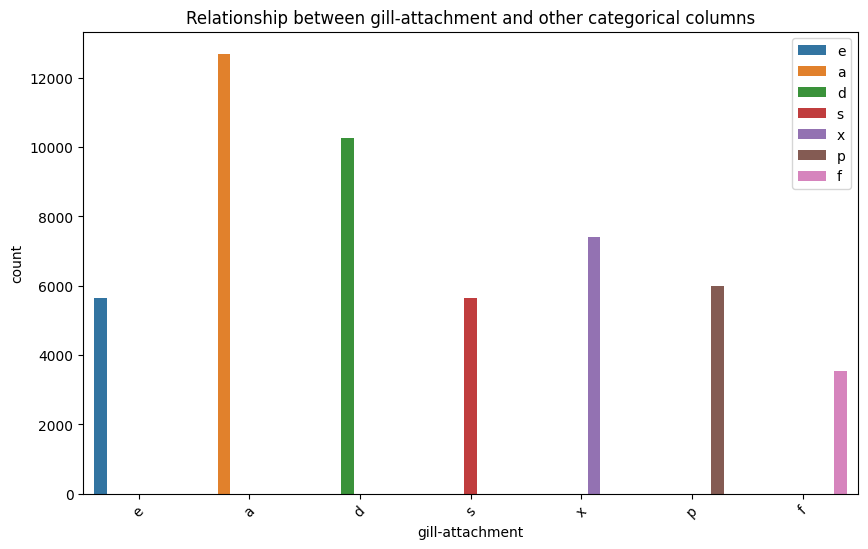

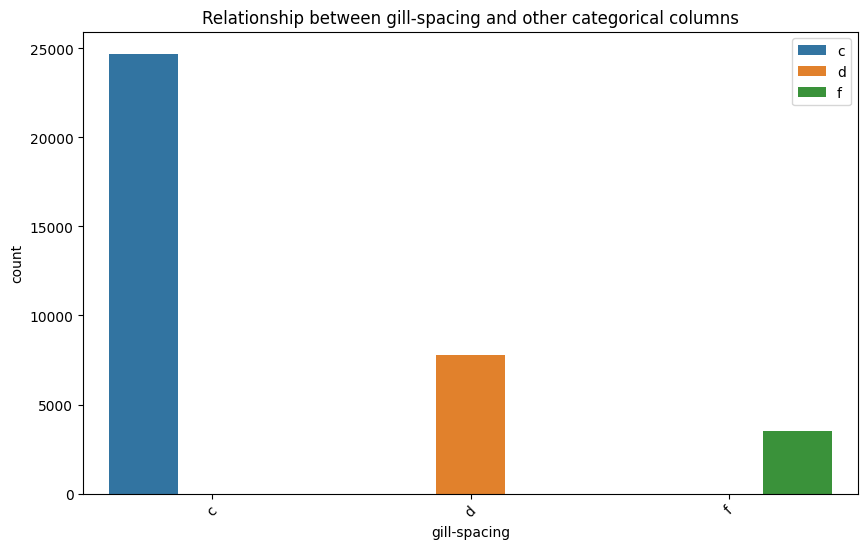

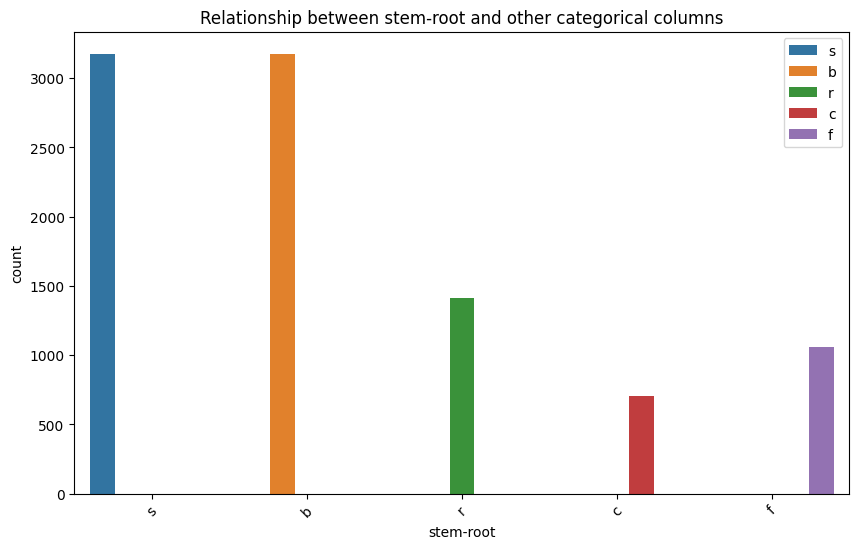

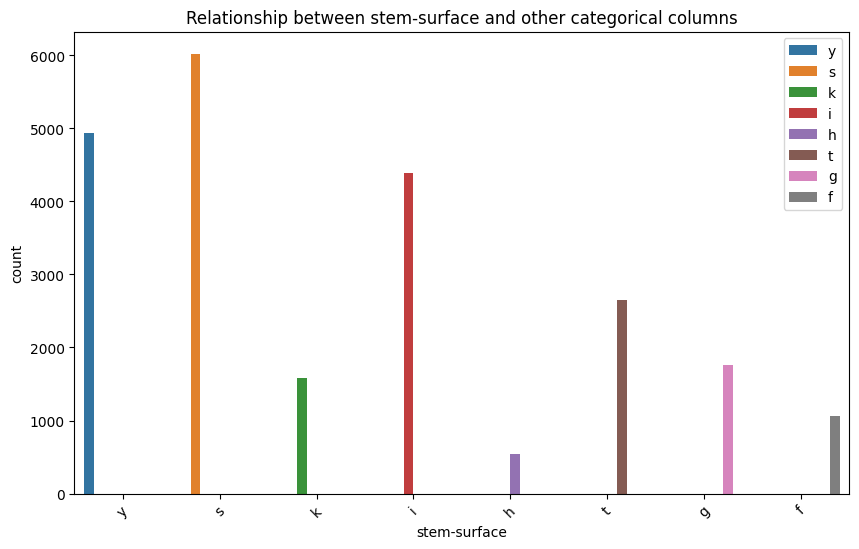

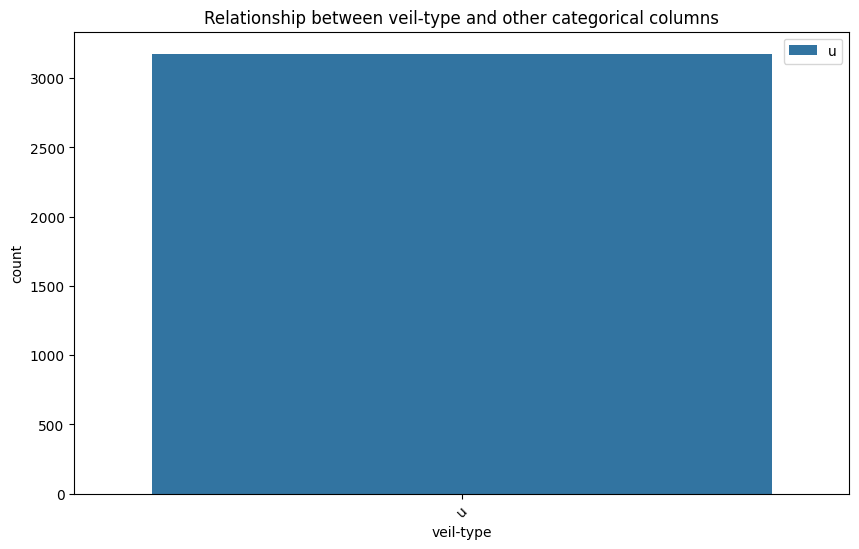

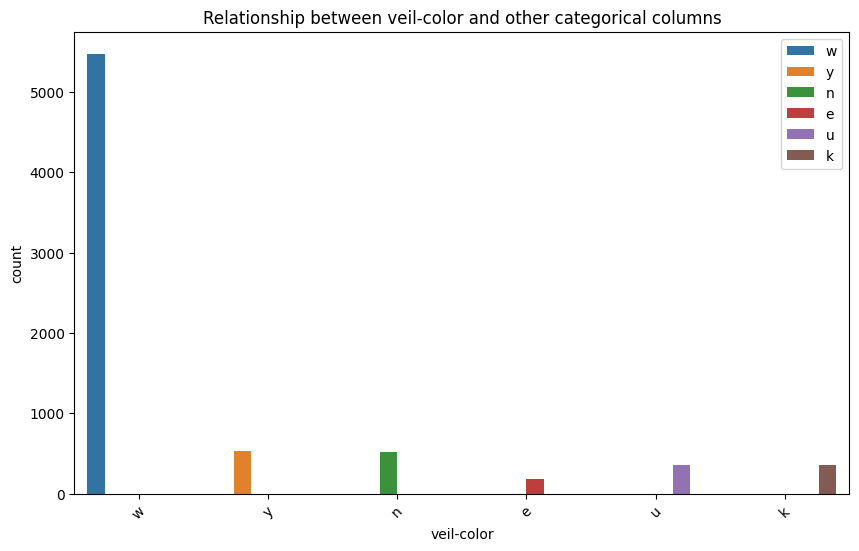

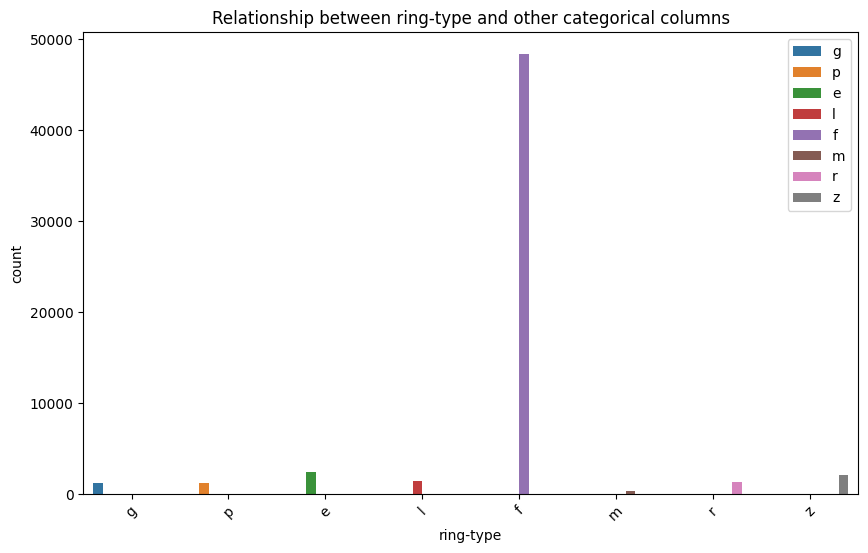

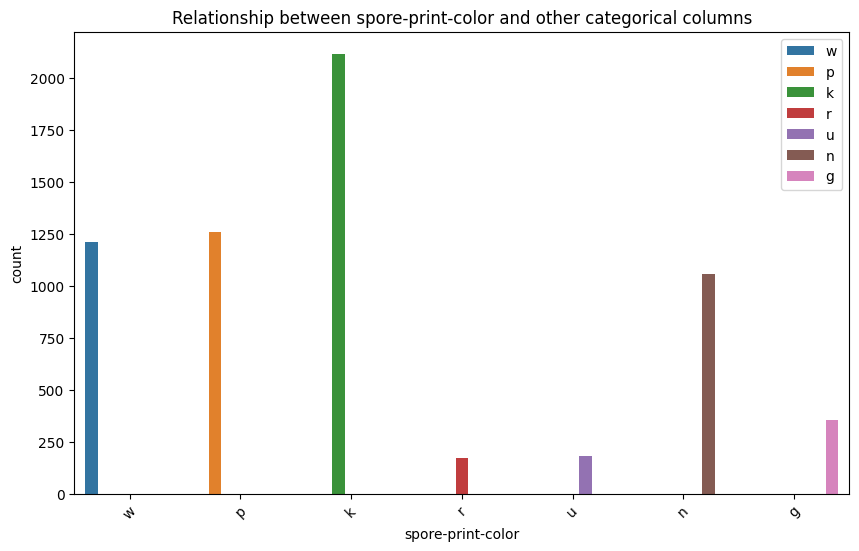

In [107]:

# Selecting only categorical columns for analysis
categorical_df = df.select_dtypes(include=['object'])

# Identify columns with missing values
columns_with_missing = categorical_df.columns[categorical_df.isnull().any()].tolist()

# Create a copy of the DataFrame without dropping columns (for comparison)
original_df = categorical_df.copy()

# Replace missing values with a placeholder to distinguish them
categorical_df[columns_with_missing] = categorical_df[columns_with_missing].fillna('Missing')

# Plotting the relationship between columns with missing values and other categorical columns
for col in columns_with_missing:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue=col, data=pd.concat([original_df[col], categorical_df.drop(columns=columns_with_missing)], axis=1))
    plt.title(f'Relationship between {col} and other categorical columns')
    plt.xticks(rotation=45)
    plt.legend(loc='upper right')
    plt.show()


## Data Preprocessing

From the above visualizations, here is what I will perform
- Drop the two columns with significant missing values and use a placeholder for `spore-print-color` and `stem-root`.
- Handle missing values by replacing them with a placeholder.

In [108]:
#make a list of columns to drop
columns_to_drop = ['veil-type', 'veil-color']

data_handler.drop_columns(columns_to_drop)
data_handler.info()


Columns dropped successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  has-ring              61069 non-null  ob

For the remaining few columns with missing entries, lets replace with placeholders.

In [109]:
data_handler.replace_missing_with_placeholder()
data_handler.info()


Missing values replaced with placeholder successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           61069 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       61069 non-null  object 
 7   gill-spacing          61069 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             61069 non-null  object 
 12  stem-surface          61069 non-null  object 
 13  stem-color            61069 non-null  object 
 14  has-ring       

With our cleaned data we move to modeling.

# Pipeline Setup and Modeling

In this section, I'll set up the pipeline for modeling:

1. **Pipeline Creation:** I'll create a pipeline to encapsulate the remaining preprocessing steps and modeling.
2. **Model Selection:** I'll choose various models for experimentation.
3. **Model Training and Evaluation:** I'll train the models on the preprocessed data and evaluate their performance using various metrics.


The next cell a pipeline is created to One-hot encode the independent variable columns and encode the dependent variable column.



In [110]:
data_handler.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           61069 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       61069 non-null  object 
 7   gill-spacing          61069 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             61069 non-null  object 
 12  stem-surface          61069 non-null  object 
 13  stem-color            61069 non-null  object 
 14  has-ring              61069 non-null  object 
 15  ring-type          

In [114]:

#numerical columns(part of the independent variables)
numerical_columns = ['cap-diameter', 'stem-height', 'stem-width']
columns_to_drop = ['class'] + numerical_columns

# One-hot encode the independent variable columns and encode the dependent variable
df_encoded = pd.get_dummies(df, columns=df.drop(columns_to_drop, axis=1).columns)
X = df_encoded.drop('class', axis=1)
y = df['class'].map({'e': 0, 'p': 1})

# Encode the target variable 'y' using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Pipeline initialization for preprocessing
preprocessing_pipeline = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('num', StandardScaler(), numerical_columns),  # StandardScaler for numerical columns
        ('cat', OneHotEncoder(), df_encoded.drop('class', axis=1).columns)  # OneHotEncoder for categorical columns
    ], remainder='passthrough')),
])

# Fit and transform the initial preprocessing pipeline
X = preprocessing_pipeline.fit_transform(X, y)

# Split the dataset to train and test after preprocessing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21, test_size=0.4)

# Apply SMOTE for handling class imbalance on the preprocessed data
smote = SMOTE(random_state=21)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


## Logistic Regression


After completing the data preprocessing steps involving feature scaling, one-hot encoding of categorical variables, and handling class imbalance using SMOTE, the dataset is now ready for model implementation.

In [116]:
# Pipeline for Logistic Regression
logistic_regression_pipeline = Pipeline([
    # ('smote', SMOTE(random_state=21)),
    ('logistic_regression', LogisticRegression())
])

# Fit the Logistic Regression pipeline to resampled data
logistic_regression_pipeline.fit(X_train_resampled, y_train_resampled)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('logistic_regression', LogisticRegression())])

Lets evaluate the performance of this model.

In [117]:
y_lr_preds = logistic_regression_pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_lr_preds)
print(f'Accuracy: {accuracy:.4f}')

# Classification report
print(classification_report(y_test, y_lr_preds))

# Calculate precision
precision = precision_score(y_test, y_lr_preds)
print(f'Precision: {precision}')

# Calculate recall
recall = recall_score(y_test, y_lr_preds)
print(f'Recall: {recall}')

# Calculate F1-score
f1 = f1_score(y_test, y_lr_preds)
print(f'F1-score: {f1}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_lr_preds)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.8636
              precision    recall  f1-score   support

           0       0.83      0.87      0.85     10848
           1       0.89      0.86      0.88     13580

    accuracy                           0.86     24428
   macro avg       0.86      0.86      0.86     24428
weighted avg       0.86      0.86      0.86     24428

Precision: 0.8899627121223651
Recall: 0.8611929307805597
F1-score: 0.8753414917106396
Confusion Matrix:
[[ 9402  1446]
 [ 1885 11695]]


The Logistic Regression model achieved an accuracy of 86.36%, indicating it correctly predicted the class label for approximately 86.36% of the samples in the test set.


Here is a visual for the above confusion matrix.

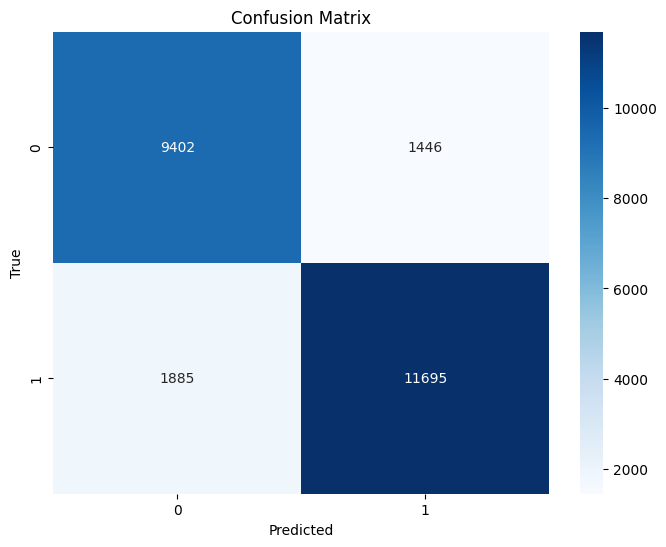

In [119]:
# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


#### Confusion Matrix:
The confusion matrix highlights that the model misclassified 1446 edible mushrooms as poisonous and 1885 poisonous mushrooms as edible.

### Logistic Regression Analysis
The model showcased balanced precision and recall for both classes.
It achieved 83% accuracy when predicting edible mushrooms and 89% accuracy for poisonous ones.

 The F1-scores stood at 0.85 for edible and 0.88 for poisonous mushrooms, effectively balancing precision and recall trade-offs.

 While the `Logistic Regression` model performs reasonably well with an accuracy of 86.36% and a balanced precision-recall tradeoff, considering the nature of `Naive Bayes` as a probabilistic model that assumes independence among features, it might offer a different perspective. It's known to perform well in classification tasks and might capture different patterns in the data that `Logistic Regression` might miss. Hence, exploring `Naive Bayes` could provide insights or improve upon the current performance metrics, contributing to a more comprehensive model evaluation

## Naive Bayes
This model assumes the independence among features and has hsown effectiveness in various classification tasks. We'll use it as an alternative and see if its a better option.

In [122]:
from scipy.sparse import csr_matrix


#pipeline, uncomment the smote if necessary
naive_bayes_pipeline = Pipeline(steps=[
    # ('smote', SMOTE(random_state=42)),
    ('naive_bayes', GaussianNB())
])


# Convert sparse matrix to dense array
X_train_resampled_dense = X_train_resampled.toarray()

# Fit the pipeline to your dense data
naive_bayes_pipeline.fit(X_train_resampled_dense, y_train_resampled)

Pipeline(steps=[('naive_bayes', GaussianNB())])

Evaluating its performance.

In [125]:
# Predictions on the test set
X_test_dense = X_test.toarray()

naive_bayes_preds = naive_bayes_pipeline.predict(X_test_dense)

# Calculate accuracy
accuracy_nb = accuracy_score(y_test, naive_bayes_preds)
print(f'Accuracy: {accuracy_nb:.4f}')

# Classification report
print(classification_report(y_test, naive_bayes_preds))

Accuracy: 0.6225
              precision    recall  f1-score   support

           0       0.76      0.22      0.34     10848
           1       0.60      0.95      0.74     13580

    accuracy                           0.62     24428
   macro avg       0.68      0.58      0.54     24428
weighted avg       0.67      0.62      0.56     24428



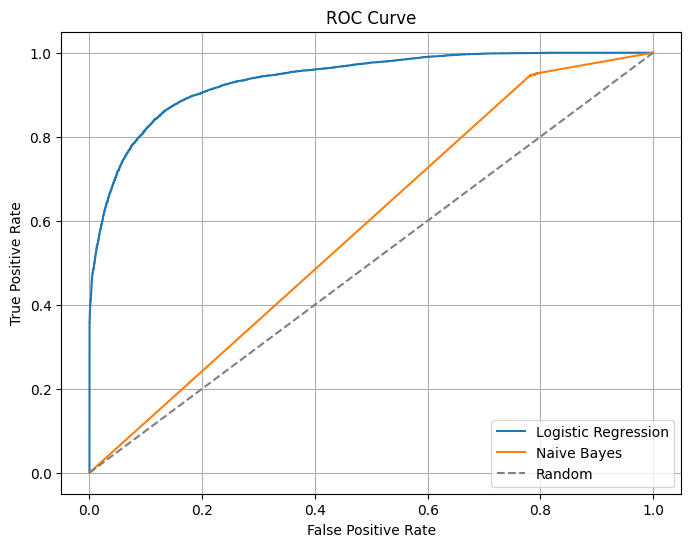

In [126]:
#comparing Naive Bayes to Logistic Regression

lr_probs = logistic_regression_pipeline.predict_proba(X_test)[:, 1]
nb_probs = naive_bayes_pipeline.predict_proba(X_test_dense)[:, 1]

# Compute ROC curve and ROC area for both models
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_probs)
fpr_nb, tpr_nb, _ = roc_curve(y_test, nb_probs)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.plot(fpr_nb, tpr_nb, label='Naive Bayes')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

Based on the ROC curve, the Logistic Regression performs better than the Naive Bayes.

### Naive Bayes Analysis
This model performed worse than the previous `Logistic Regression` model with an accuracy of 62.25%.

Its precision for edible mushrooms was 0.76 meaning it was correct 76% of the time, the recall for this class was lower at 0.22.

As for the poisounous class, it was correct 60% of the time with a precision of 0.60, however, the recall for this class was higher with 0.95, signifying it identified the majority of actual poisonous mushrooms.
The F1-scores were 0.34 for class 0 and 0.74 for class 1, showing a trade-off between precision and recall.

The model's overall performance seems to be less balanced compared to logistic regression. Now considering this, the next model, the Random Forest, could potentially offer improved performance compared to both because of their ability to handle complex relationships in data.

## Random Forest Model

The Random Forest model is an ensemble learning technique based on multiple decision trees that makes it superior in predictive power and resilient to overfitting.

The earlier use of GridSearchCV for hyperparameter tuning is to optimize model performance, ensuring the Random Forest is finely tuned for improved accuracy and robustness.

In [131]:
# Create a pipeline for Random Forest with a grid search CV for hyperparameter tuning

# Random Forest pipeline
random_forest_pipeline = Pipeline([
    ('rf', RandomForestClassifier(random_state=21))
])

# Define hyperparameters grid for Random Forest
param_grid = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [None, 5, 10, 20],
    # Add other hyperparameters you want to tune
}

# Create GridSearchCV instance
grid_search_rf = GridSearchCV(random_forest_pipeline, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to your training data
grid_search_rf.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and the best score
best_params = grid_search_rf.best_params_
best_score = grid_search_rf.best_score_

# Access the best estimator (pipeline) directly
best_rf_pipeline = grid_search_rf.best_estimator_


In [132]:
# Predictions on validation set
y_pred = best_rf_pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10848
           1       1.00      1.00      1.00     13580

    accuracy                           1.00     24428
   macro avg       1.00      1.00      1.00     24428
weighted avg       1.00      1.00      1.00     24428



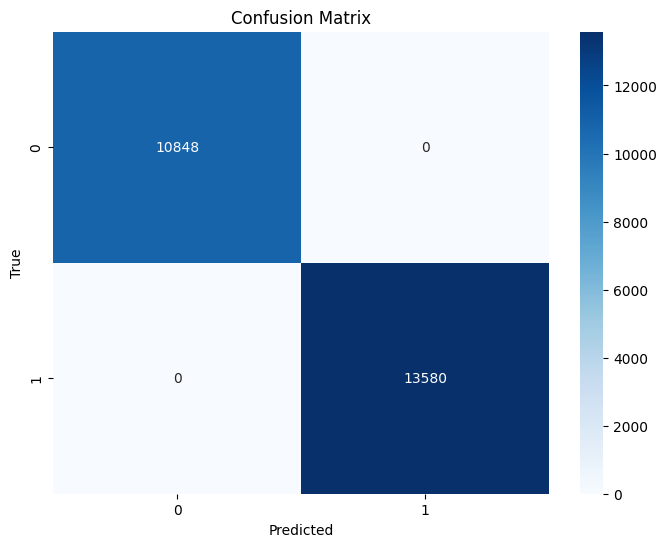

In [129]:
# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(rf_conf_matrix, annot=True, cmap='Blues', fmt='g')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


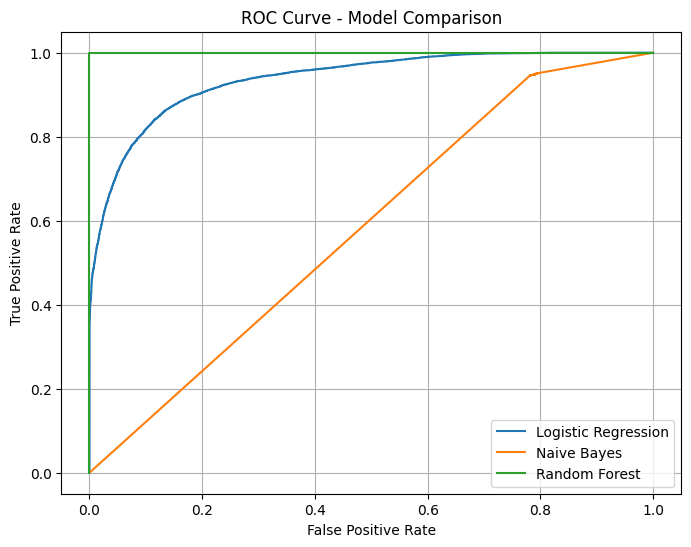

In [134]:
from sklearn.metrics import roc_curve, RocCurveDisplay

# Get predicted probabilities for each model
y_lr_probs = logistic_regression_pipeline.predict_proba(X_test)[:, 1]
y_nb_probs = naive_bayes_pipeline.predict_proba(X_test_dense)[:, 1]
y_rf_probs = best_rf_pipeline.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC for each model
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_lr_probs)
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_nb_probs)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_rf_probs)

# Plot ROC curves for all models
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.plot(fpr_nb, tpr_nb, label='Naive Bayes')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Model Comparison')
plt.legend()
plt.grid()
plt.show()


### Random Forest Analysis
The `Random Forest` model's performance was outstanding on the mushroom dataset, achieving perfection in all evaluation metrics. With an accuracy, precision, recall, and F1-score all reaching 100%, this model exhibited an exceptional ability to classify mushrooms accurately. Such high precision and recall values indicate a flawless ability to differentiate between edible and poisonous mushrooms, making the Random Forest model the most accurate and reliable among the three models considered in this analysis.

This can be observed from the ROC curve above.

## Conclusion
`Logistic Regression`: Displayed a balanced precision and recall for both classes. With an accuracy of 86.36%, it had relatively good performance in distinguishing between edible and poisonous mushrooms.

`Naive Bayes`: Showed considerable improvement in recall for class 1 (poisonous mushrooms) compared to logistic regression, achieving 95% recall. However, precision for class 0 (edube mushrooms) was lower at 76%.

`Random Forest`: Exhibited near-perfect results with an accuracy, precision, recall, and F1-score all at 100%. This indicates an excellent ability to classify mushrooms correctly, making it the most accurate model among the three.

In conclusion, while `logistic regression` and `naive bayes` showcased reasonable performances, the `random forest` model delivered exceptional results, demonstrating a superior ability to distinguish between edible and poisonous mushrooms in this dataset.